## 3. 넘파이
- 데이터 처리 부분의 대부분을 담당한다.
- 사이킷런의 경우 넘파이 기반에서 작성되었기 때문에 기본 프레임워크를 이해해야한다.


### 3_1 넘파이의 개요
Numerical python을 의미하며, 루프를 사용하지 않고 대량 데이터의 배열 연산을 가능하게 한다.

In [1]:
import numpy as np

In [3]:
array1 = np.array([1,2,3]) #ndarray로 변환한다.
print('array1 type:',type(array1)) #array1의 type
print('array1 array 형태:',array1.shape) # array의 형태_배열의 형태를 튜플 형태로 나타내서 보여준다.

array2 = np.array([[1,2,3],
                  [2,3,4]])
print('array2 type:',type(array2))
print('array2 array 형태:',array2.shape)

array3 = np.array([[1,2,3]])
print('array3 type:',type(array3))
print('array3 array 형태:',array3.shape)
# array1과 달리 array2는 이차원데이터이다.
# array1은 일종의 벡터 (3,)는 일차원 표시
# 차원을 이해하는 것은 매우 중요하다. 오류를 막기 위해.


array1 type: <class 'numpy.ndarray'>
array1 array 형태: (3,)
array2 type: <class 'numpy.ndarray'>
array2 array 형태: (2, 3)
array3 type: <class 'numpy.ndarray'>
array3 array 형태: (1, 3)


In [4]:
print('array1: {:0}차원, array2: {:1}차원, array3: {:2}차원'.format(array1.ndim,array2.ndim,array3.ndim))


array1: 1차원, array2: 2차원, array3:  2차원


데이터 타입

In [5]:
list1 = [1,2,3] # 배열의 원소가 모두 정수이다.
print(type(list1))
array1 = np.array(list1)
print(type(array1))
print(array1, array1.dtype)

<class 'list'>
<class 'numpy.ndarray'>
[1 2 3] int32


In [6]:
arraytest = np.array([list1])
array

In [8]:
list2 = [1, 2, 'test']
array2 = np.array(list2)
print(array2, array2.dtype)

list3 = [1, 2, 3.0] # int+float
array3 = np.array(list3)
print(array3, array3.dtype)

['1' '2' 'test'] <U11
[1. 2. 3.] float64


> 숫자형 값이 문자열 값으로=유니코드로 변경됨.
더 큰 집합의 데이터타입으로 변경되는 것이다.

In [9]:
array_int = np.array([1, 2, 3])
array_float = array_int.astype('float64')
print(array_float, array_float.dtype)

array_int1= array_float.astype('int32')
print(array_int1, array_int1.dtype)

array_float1 = np.array([1.1, 2.1, 3.1])
array_int2= array_float1.astype('int32')
print(array_int2, array_int2.dtype)

[1. 2. 3.] float64
[1 2 3] int32
[1 2 3] int32


ndarray를 편리하게 생성하기 - arange, zeros, ones

In [11]:
sequence_array = np.arange(10) # r파이썬 표준 함수와 유사
print(sequence_array)
print(sequence_array.dtype, sequence_array.shape)

[0 1 2 3 4 5 6 7 8 9]
int32 (10,)


In [12]:
zero_array = np.zeros((3,2),dtype='int32')
print(zero_array)
print(zero_array.dtype, zero_array.shape)

one_array = np.ones((3,2))
print(one_array)
print(one_array.dtype, one_array.shape)

[[0 0]
 [0 0]
 [0 0]]
int32 (3, 2)
[[1. 1.]
 [1. 1.]
 [1. 1.]]
float64 (3, 2)


차원과 크기를 변경하는 reshape

In [13]:
array1 = np.arange(10)
print('array1:\n', array1)

array2 = array1.reshape(2,5)
print('array2:\n',array2)

array3 = array1.reshape(5,2)
print('array3:\n',array3)

array1:
 [0 1 2 3 4 5 6 7 8 9]
array2:
 [[0 1 2 3 4]
 [5 6 7 8 9]]
array3:
 [[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


In [14]:
array1.reshape(4,3)
# 사이즈가 다르면 오류가 난다.

ValueError: cannot reshape array of size 10 into shape (4,3)

In [15]:
# -1을 인자로 사용하면 새로운 shape로 변환해 준다.
# 직관적으로 원하는 열이나 행개수를 설정 가능하다.
array1 = np.arange(10)
print(array1)

array2 = array1.reshape(-1,5)
print('array2 shape:',array2.shape)

array3 = array1.reshape(5,-1)
print('array3 shape:',array3.shape)

[0 1 2 3 4 5 6 7 8 9]
array2 shape: (2, 5)
array3 shape: (5, 2)


In [16]:
# 원하는 열, 행이 전부 되는 것은 아니다.
# element 개수의 최대 공약수여야한다.
array1 = np.arange(10)
array4 = array1.reshape(-1,4)

ValueError: cannot reshape array of size 10 into shape (4)

넘파이의 ndarray의 데이터 세트 선택하기- indexing

> 1. 특정한 데이터만 추출: 원하는 위치의 인덱스 값을 지정하면 해당 위치의 데이터가 반환된다.
> 2. 연속된 인덱스를 이용하는 것이다. 시작 인덱스에서 종료 인덱스-1 위치에 있는 데이터의 ndarray를 반환한다.
> 3. 팬시 인덱싱: 일정한 인덱싱 집합을 리스트 또는 ndarray 형태로 지정한다.(차원의 인덱싱)
> 4. 불린 인덱싱: boolean의 논리값 True/False 값 인덱싱 집합을 기반으로 True 위치에 해당하는 데이터의 ndarray를 반환한다.

1번 특정한 데이터 추출

In [17]:
# 1에서 부터 9 까지의 1차원 ndarray 생성 
array1 = np.arange(start=1, stop=10)
print('array1:',array1)
# index는 0 부터 시작하므로 array1[2]는 3번째 index 위치의 데이터 값을 의미
value = array1[2]
print('value:',value)
print(type(value))

array1: [1 2 3 4 5 6 7 8 9]
value: 3
<class 'numpy.int32'>


In [18]:
print('맨 뒤의 값:',array1[-1], ', 맨 뒤에서 두번째 값:',array1[-2])


맨 뒤의 값: 9 , 맨 뒤에서 두번째 값: 8


1.1 ndarray 내의 데이터값 수정

In [19]:
array1[0] = 9
array1[8] = 0
print('array1:',array1)

array1: [9 2 3 4 5 6 7 8 0]


In [20]:
array1d = np.arange(start=1, stop=10)
array2d = array1d.reshape(3,3)
print(array2d)

print('(row=0,col=0) index 가리키는 값:', array2d[0,0] )
print('(row=0,col=1) index 가리키는 값:', array2d[0,1] )
print('(row=1,col=0) index 가리키는 값:', array2d[1,0] )
print('(row=2,col=2) index 가리키는 값:', array2d[2,2] )

[[1 2 3]
 [4 5 6]
 [7 8 9]]
(row=0,col=0) index 가리키는 값: 1
(row=0,col=1) index 가리키는 값: 2
(row=1,col=0) index 가리키는 값: 4
(row=2,col=2) index 가리키는 값: 9


2. 슬라이싱

In [21]:
array1 = np.arange(start=1, stop=10)
array3 = array1[0:3]
print(array3)
print(type(array3))

[1 2 3]
<class 'numpy.ndarray'>


In [22]:
array1 = np.arange(start=1, stop=10)
array4 = array1[:3]
print(array4)

array5 = array1[3:]
print(array5)

array6 = array1[:]
print(array6)

[1 2 3]
[4 5 6 7 8 9]
[1 2 3 4 5 6 7 8 9]


In [24]:
# 2차원 슬라이싱
array1d = np.arange(start=1, stop=10)
array2d = array1d.reshape(3,3)
print('array2d:\n',array2d)

print('array2d[0:2, 0:2] \n', array2d[0:2, 0:2])
print('array2d[1:3, 0:3] \n', array2d[1:3, 0:3])
print('array2d[1:3, :] \n', array2d[1:3, :])
print('array2d[:, :] \n', array2d[:, :])
print('array2d[:2, 1:] \n', array2d[:2, 1:])
print('array2d[:2, 0] \n', array2d[:2, 0])

array2d:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
array2d[0:2, 0:2] 
 [[1 2]
 [4 5]]
array2d[1:3, 0:3] 
 [[4 5 6]
 [7 8 9]]
array2d[1:3, :] 
 [[4 5 6]
 [7 8 9]]
array2d[:, :] 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
array2d[:2, 1:] 
 [[2 3]
 [5 6]]
array2d[:2, 0] 
 [1 4]


3. 팬시 인덱싱

In [25]:
array1d = np.arange(start=1, stop=10)
array2d = array1d.reshape(3,3)
# row 축과 column 축의 조합으로 생각하는 것이 좋다.
array3 = array2d[[0,1], 2] 
print('array2d[[0,1], 2] => ',array3.tolist())

array4 = array2d[[0,1], 0:2]
print('array2d[[0,1], 0:2] => ',array4.tolist())

array5 = array2d[[0,1]]
print('array2d[[0,1]] => ',array5.tolist())

array2d[[0,1], 2] =>  [3, 6]
array2d[[0,1], 0:2] =>  [[1, 2], [4, 5]]
array2d[[0,1]] =>  [[1, 2, 3], [4, 5, 6]]


불린 인덱싱

In [26]:
array1d = np.arange(start=1, stop=10)
# [ ] 안에 array1d > 5 Boolean indexing을 적용 
# True 값만 추출한다.
array3 = array1d[array1d > 5]
print('array1d > 5 불린 인덱싱 결과 값 :', array3)

array1d > 5 불린 인덱싱 결과 값 : [6 7 8 9]


In [27]:
array1d > 5

array([False, False, False, False, False,  True,  True,  True,  True])

In [28]:
boolean_indexes = np.array([False, False, False, False, False,  True,  True,  True,  True])
array3 = array1d[boolean_indexes]
print('불린 인덱스로 필터링 결과 :', array3)

불린 인덱스로 필터링 결과 : [6 7 8 9]


In [29]:
indexes = np.array([5,6,7,8])
array4 = array1d[ indexes ]
print('일반 인덱스로 필터링 결과 :',array4)

일반 인덱스로 필터링 결과 : [6 7 8 9]


행렬의 정렬 - sort()와 argsort()
- 행렬 정렬

In [30]:
org_array = np.array([ 3, 1, 9, 5]) 
print('원본 행렬:', org_array)
# np.sort( )로 정렬-numpy에서 sort()를 호출한다.
sort_array1 = np.sort(org_array)         
print ('np.sort( ) 호출 후 반환된 정렬 행렬:', sort_array1) 
print('np.sort( ) 호출 후 원본 행렬:', org_array) # 원행렬을 유지한채로 새롭게 정렬하는 것이다.
# ndarray.sort( )로 정렬-행렬 자체에서 sort()를 호출한다.
sort_array2 = org_array.sort()
print('org_array.sort( ) 호출 후 반환된 행렬:', sort_array2)
print('org_array.sort( ) 호출 후 원본 행렬:', org_array) #원본행렬을 바꾸는 것이다.

원본 행렬: [3 1 9 5]
np.sort( ) 호출 후 반환된 정렬 행렬: [1 3 5 9]
np.sort( ) 호출 후 원본 행렬: [3 1 9 5]
org_array.sort( ) 호출 후 반환된 행렬: None
org_array.sort( ) 호출 후 원본 행렬: [1 3 5 9]


In [31]:
sort_array1_desc = np.sort(org_array)[::-1]
print ('내림차순으로 정렬:', sort_array1_desc) 

내림차순으로 정렬: [9 5 3 1]


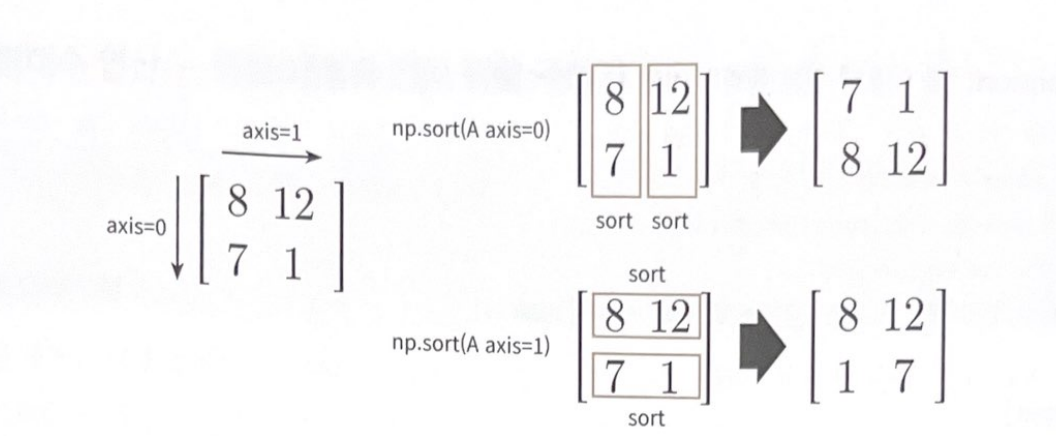

In [32]:
array2d = np.array([[8, 12], 
                   [7, 1 ]])

sort_array2d_axis0 = np.sort(array2d, axis=0)
print('로우 방향으로 정렬:\n', sort_array2d_axis0)

sort_array2d_axis1 = np.sort(array2d, axis=1)
print('컬럼 방향으로 정렬:\n', sort_array2d_axis1)

로우 방향으로 정렬:
 [[ 7  1]
 [ 8 12]]
컬럼 방향으로 정렬:
 [[ 8 12]
 [ 1  7]]


- 정렬 행렬의 인덱스 반환

In [34]:
org_array = np.array([ 3, 1, 9, 5]) 
sort_indices = np.argsort(org_array)
print(type(sort_indices))
print('행렬 정렬 시 원본 행렬의 인덱스:', sort_indices)

<class 'numpy.ndarray'>
행렬 정렬 시 원본 행렬의 인덱스: [1 0 3 2]


In [35]:
org_array = np.array([ 3, 1, 9, 5]) 
sort_indices_desc = np.argsort(org_array)[::-1]
print('행렬 내림차순 정렬 시 원본 행렬의 인덱스:', sort_indices_desc)

행렬 내림차순 정렬 시 원본 행렬의 인덱스: [2 3 0 1]


넘파이는 메타 데이터를 가질 수 없다. 실제 값과 그 값이 뜻하는 메타 데이터를 별도의 ndarray로 각각 가져야한다.
이름과 성적을 같이 가지는 데이터-> 메타 데이터
이름 array와 성적 array를 따로 존재시키고, 성적 idx로 이름을 추출한다.

선형대수 연산 - 행렬 내적과 전치 행렬 구하기
- 행렬 내적

In [36]:
# 행렬 내적은 행렬곱을 의미한다.
A = np.array([[1, 2, 3],
              [4, 5, 6]])
B = np.array([[7, 8],
              [9, 10],
              [11, 12]])

dot_product = np.dot(A, B)
print('행렬 내적 결과:\n', dot_product)

행렬 내적 결과:
 [[ 58  64]
 [139 154]]


- 전치 행렬

In [37]:

A = np.array([[1, 2],
              [3, 4]])
transpose_mat = np.transpose(A)
print('A의 전치 행렬:\n', transpose_mat)

A의 전치 행렬:
 [[1 3]
 [2 4]]


## 4. 판다스

넘파이 : 파이썬의 리스트, 컬렉션, 넘파이 등의 내부 데이터 변경

판다스 : 그 이상 CSV 등의 파일을 쉽게 DataFrame으로 변경해 데이터의 가공/분석을 편하게 수행할 수 있게 함.

- 데이터 프레임 (DataFrame) : 여러 개의 행과 열로 이뤄진 2차원 데이터를 담는 데이터 구조체이다.
 - index: 개별 데이터를 고유하게 식별하는 key 값.
 - series: 칼럼이 하나뿐인 데이터 구조체이다.

In [43]:
import pandas as pd

titanic_df = pd.read_csv('train.csv')
# 파일명 인자로 들어온 파일을 로딩해 DataFrame 객체로 변환
# 판다스의 index 값이 0,1,2,3,4로 기재되어 있다.
print('titanic 변수 type:',type(titanic_df))
titanic_df.head(3) # head default는 5이다.

titanic 변수 type: <class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [44]:
print('DataFrame 크기: ', titanic_df.shape)


DataFrame 크기:  (891, 12)


In [45]:
titanic_df.info()
# 칼럼의 타입, Null 데이터의 개수 파악.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
titanic_df.describe()
# 데이터 분포
# min, max가 0, 1 이면 두가지 수로 이루어진 것.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
value_counts = titanic_df['Pclass'].value_counts()
print(value_counts)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [48]:
titanic_pclass = titanic_df['Pclass']
print(type(titanic_pclass))

<class 'pandas.core.series.Series'>


In [49]:
titanic_pclass.head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

In [50]:
value_counts = titanic_df['Pclass'].value_counts() # series
print(type(value_counts))
print(value_counts)

<class 'pandas.core.series.Series'>
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


DataFrame과 리스트, 딕셔너리, 넘파이 ndarray 상호 변환
- 넘파이 ndarray, 리스트, 딕셔너리를 DataFrame으로 변환하기

In [52]:
import numpy as np

col_name1=['col1'] #column 이름
list1 = [1, 2, 3]
array1 = np.array(list1)

print('array1 shape:', array1.shape )
df_list1 = pd.DataFrame(list1, columns=col_name1)
print('1차원 리스트로 만든 DataFrame:\n', df_list1)
df_array1 = pd.DataFrame(array1, columns=col_name1)
print('1차원 ndarray로 만든 DataFrame:\n', df_array1)

array1 shape: (3,)
1차원 리스트로 만든 DataFrame:
    col1
0     1
1     2
2     3
1차원 ndarray로 만든 DataFrame:
    col1
0     1
1     2
2     3


In [53]:
# 3개의 컬럼명이 필요함. 
col_name2=['col1', 'col2', 'col3']

# 2행x3열 형태의 리스트와 ndarray 생성 한 뒤 이를 DataFrame으로 변환. 
list2 = [[1, 2, 3],
         [11, 12, 13]]
array2 = np.array(list2)
print('array2 shape:', array2.shape )
df_list2 = pd.DataFrame(list2, columns=col_name2)
print('2차원 리스트로 만든 DataFrame:\n', df_list2)
df_array2 = pd.DataFrame(array2, columns=col_name2)
print('2차원 ndarray로 만든 DataFrame:\n', df_array2)

array2 shape: (2, 3)
2차원 리스트로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    12    13
2차원 ndarray로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    12    13


In [54]:
# Key는 컬럼명으로 매핑, Value는 리스트 형(또는 ndarray)
dict = {'col1':[1, 11], 'col2':[2, 22], 'col3':[3, 33]}
df_dict = pd.DataFrame(dict)
print('딕셔너리로 만든 DataFrame:\n', df_dict)

딕셔너리로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    22    33


- DataFrame을 넘파이 ndarray, 리스트, 딕셔너리로 변환하기

In [55]:
# DataFrame을 ndarray로 변환
array3 = df_dict.values
print('df_dict.values 타입:', type(array3), 'df_dict.values shape:', array3.shape)
print(array3)

df_dict.values 타입: <class 'numpy.ndarray'> df_dict.values shape: (2, 3)
[[ 1  2  3]
 [11 22 33]]


In [56]:
# DataFrame을 리스트로 변환 ndarray에서 list 2번
list3 = df_dict.values.tolist()
print('df_dict.values.tolist() 타입:', type(list3))
print(list3)

# DataFrame을 딕셔너리로 변환
dict3 = df_dict.to_dict('list')
print('\n df_dict.to_dict() 타입:', type(dict3))
print(dict3)

df_dict.values.tolist() 타입: <class 'list'>
[[1, 2, 3], [11, 22, 33]]

 df_dict.to_dict() 타입: <class 'dict'>
{'col1': [1, 11], 'col2': [2, 22], 'col3': [3, 33]}


DataFrame의 컬럼 데이터 셋 Access


In [57]:
titanic_df['Age_0']=0 #새로운 데이터를 추가한다.
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


In [58]:
# 기존의 series의 데이터를 이용해 새로운 column series.
titanic_df['Age_by_10'] = titanic_df['Age']*10
titanic_df['Family_No'] = titanic_df['SibSp'] + titanic_df['Parch']+1
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,220.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,380.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,260.0,1


In [59]:
titanic_df['Age_by_10'] = titanic_df['Age_by_10'] + 100
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,320.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,480.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,360.0,1


DataFrame 데이터 삭제

In [60]:
titanic_drop_df = titanic_df.drop('Age_0', axis=1 ) #Implace는 디폴트가 False, 기재하지 않으면 자동으로 false
titanic_drop_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,320.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,480.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,360.0,1


In [61]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,320.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,480.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,360.0,1


In [62]:
drop_result = titanic_df.drop(['Age_0', 'Age_by_10', 'Family_No'], axis=1, inplace=True) # 칼럼 축 방향으로 드롭을 수행.
print(' inplace=True 로 drop 후 반환된 값:',drop_result)
titanic_df.head(3)

 inplace=True 로 drop 후 반환된 값: None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [80]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 15)
print('#### before axis 0 drop ####')
print(titanic_df.head(3))

titanic_df.drop([0,1,2], axis=0, inplace=True)

print('#### after axis 0 drop ####')
print(titanic_df.head(3))

#### before axis 0 drop ####
   PassengerId  Survived  Pclass            Name     Sex   Age  SibSp  Parch          Ticket     Fare Cabin Embarked
0            1         0       3  Braund, Mr....    male  22.0      1      0       A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mr...  female  38.0      1      0        PC 17599  71.2833   C85        C
2            3         1       3  Heikkinen, ...  female  26.0      0      0  STON/O2. 31...   7.9250   NaN        S
#### after axis 0 drop ####
   PassengerId  Survived  Pclass            Name     Sex   Age  SibSp  Parch  Ticket     Fare Cabin Embarked
3            4         1       1  Futrelle, M...  female  35.0      1      0  113803  53.1000  C123        S
4            5         0       3  Allen, Mr. ...    male  35.0      0      0  373450   8.0500   NaN        S
5            6         0       3  Moran, Mr. ...    male   NaN      0      0  330877   8.4583   NaN        Q


Index 객체

In [66]:
# 원본 파일 재 로딩- 앞에서 삭제했기에 재 로딩한다. 
titanic_df = pd.read_csv('train.csv')
# Index 객체 추출
indexes = titanic_df.index
print(indexes)
# Index 객체를 실제 값 arrray로 변환 
print('Index 객체 array값:\n',indexes.values)

RangeIndex(start=0, stop=891, step=1)
Index 객체 array값:
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232

In [67]:
# 단일 값 반환 및 슬라이싱도 가능하다.
print(type(indexes.values))
print(indexes.values.shape)
print(indexes[:5].values)
print(indexes.values[:5])

<class 'numpy.ndarray'>
(891,)
[0 1 2 3 4]
[0 1 2 3 4]


In [68]:
indexes[0] = 5
# index는 변경할 수 없다.

TypeError: Index does not support mutable operations

In [69]:
series_fair = titanic_df['Fare']
print('Fair Series max 값:', series_fair.max())
print('Fair Series sum 값:', series_fair.sum())
print('sum() Fair Series:', sum(series_fair))
print('Fair Series + 3:\n',(series_fair + 3).head(3) )

Fair Series max 값: 512.3292
Fair Series sum 값: 28693.9493
sum() Fair Series: 28693.949299999967
Fair Series + 3:
 0    10.2500
1    74.2833
2    10.9250
Name: Fare, dtype: float64


In [70]:
titanic_reset_df = titanic_df.reset_index(inplace=False) # idx를 reset한다.
titanic_reset_df.head(3)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [71]:
print('### before reset_index ###')
value_counts = titanic_df['Pclass'].value_counts()
print(value_counts)
print('value_counts 객체 변수 타입:',type(value_counts))
# index를 reset해서 내로운 dataframe을 만들면, series이다.
new_value_counts = value_counts.reset_index(inplace=False)
print('### After reset_index ###')
print(new_value_counts)
print('new_value_counts 객체 변수 타입:',type(new_value_counts))

### before reset_index ###
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
value_counts 객체 변수 타입: <class 'pandas.core.series.Series'>
### After reset_index ###
   Pclass  count
0       3    491
1       1    216
2       2    184
new_value_counts 객체 변수 타입: <class 'pandas.core.frame.DataFrame'>


데이터 셀렉션 및 필터링
- DataFrame의 [ ] 연산자 ( 넘파이와의 차이)

In [73]:
print('단일 컬럼 데이터 추출:\n', titanic_df[ 'Pclass' ].head(3))
print('\n여러 컬럼들의 데이터 추출:\n', titanic_df[ ['Survived', 'Pclass'] ].head(3))
print('[ ] 안에 숫자 index는 KeyError 오류 발생:\n', titanic_df[0]) # 칼럼 지정은 칼럼명만 가능하다.

단일 컬럼 데이터 추출:
 0    3
1    1
2    3
Name: Pclass, dtype: int64

여러 컬럼들의 데이터 추출:
    Survived  Pclass
0         0       3
1         1       1
2         1       3


KeyError: 0

In [74]:
titanic_df[0:2] # 인덱스 형태로 변환 가능하면 된다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [122]:
print(titanic_df['Pclass']==3)
titanic_df[ titanic_df['Pclass'] == 3].head(3)

0       True
1      False
2       True
3      False
4       True
       ...  
886    False
887    False
888     True
889    False
890     True
Name: Pclass, Length: 891, dtype: bool


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_len,Child_Adult,Age_cat
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.250,C000,S,23,Adult,Student
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.925,C000,S,22,Adult,Young Adult
4,5,0,3,"Allen, Mr. ...",male,35.0,0,0,373450,8.050,C000,S,24,Adult,Young Adult


- DataFrame ix[] 연산자 / 현재 버전에서는 사라져서 오류가 났다.

In [76]:
print('컬럼 위치 기반 인덱싱 데이터 추출:',titanic_df.ix[0,2])
print('컬럼명 기반 인덱싱 데이터 추출:',titanic_df.ix[0,'Pclass'])

AttributeError: 'DataFrame' object has no attribute 'ix'

In [77]:
data = {'Name': ['Chulmin', 'Eunkyung','Jinwoong','Soobeom'],
        'Year': [2011, 2016, 2015, 2015],
        'Gender': ['Male', 'Female', 'Male', 'Male']
       }
data_df = pd.DataFrame(data, index=['one','two','three','four'])
data_df

,Name,Year,Gender
one,Chulmin,2011,Male
two,Eunkyung,2016,Female
three,Jinwoong,2015,Male
four,Soobeom,2015,Male


In [79]:
print("\n ix[0,0]", data_df.ix[0,0])
print("\n ix['one', 0]", data_df.ix['one',0])
print("\n ix[3, 'Name']",data_df.ix[3, 'Name'],"\n")

print("\n ix[0:2, [0,1]]\n", data_df.ix[0:2, [0,1]])
print("\n ix[0:2, [0:3]]\n", data_df.ix[0:2, 0:3])
print("\n ix[0:3, ['Name', 'Year']]\n", data_df.ix[0:3, ['Name', 'Year']], "\n")
print("\n ix[:] \n", data_df.ix[:])
print("\n ix[:, :] \n", data_df.ix[:, :])

print("\n ix[data_df.Year >= 2014] \n", data_df.ix[data_df.Year >= 2014])

AttributeError: 'DataFrame' object has no attribute 'ix'

- 명칭 기반 인덱싱(loc)과 위치 기반 인덱싱(iloc)의 구분 

In [82]:
# data_df 를 reset_index() 로 새로운 숫자형 인덱스를 생성
data_df_reset = data_df.reset_index()
data_df_reset = data_df_reset.rename(columns={'index':'old_index'})

# index 값에 1을 더해서 1부터 시작하는 새로운 index값 생성
data_df_reset.index = data_df_reset.index+1
data_df_reset

,old_index,Name,Year,Gender
1,one,Chulmin,2011,Male
2,two,Eunkyung,2016,Female
3,three,Jinwoong,2015,Male
4,four,Soobeom,2015,Male


In [83]:
# 아래 코드는 오류를 발생합니다. 
data_df_reset.ix[0,1]

AttributeError: 'DataFrame' object has no attribute 'ix'

- DataFrame iloc[ ] 연산자

In [84]:
data_df.iloc[0, 0]

'Chulmin'

In [85]:
# 아래 코드는 오류를 발생합니다. 
data_df.iloc[0, 'Name']

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [86]:
# 아래 코드는 오류를 발생합니다. 
data_df.iloc['one', 0]

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [87]:
data_df_reset.iloc[0, 1]

'Chulmin'

- DataFrame loc[ ] 연산자

In [88]:
data_df.loc['one', 'Name'] # data_df의 행과 열은 인덱스가 one, two

'Chulmin'

In [89]:
data_df_reset.loc[1, 'Name']

'Chulmin'

In [90]:
# 아래 코드는 오류를 발생합니다. 
data_df_reset.loc[0, 'Name']

KeyError: 0

In [91]:
print('명칭기반 ix slicing\n', data_df.ix['one':'two', 'Name'],'\n')
print('위치기반 iloc slicing\n', data_df.iloc[0:1, 0],'\n')
print('명칭기반 loc slicing\n', data_df.loc['one':'two', 'Name'])

AttributeError: 'DataFrame' object has no attribute 'ix'

In [92]:
print(data_df_reset.loc[1:2 , 'Name'])

1     Chulmin
2    Eunkyung
Name: Name, dtype: object


In [93]:
print(data_df.ix[1:2 , 'Name'])

AttributeError: 'DataFrame' object has no attribute 'ix'

- 불린 인덱싱

In [95]:
titanic_df = pd.read_csv('train.csv')
titanic_boolean = titanic_df[titanic_df['Age'] > 60]
print(type(titanic_boolean))
titanic_boolean

<class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr...",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. ...",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,Goldschmidt...,male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr...",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,Van der hoe...,male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. ...",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Mi...",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. ...",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr...",male,61.0,0,0,345364,6.2375,NaN,S
438,439,0,1,"Fortune, Mr...",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [96]:
titanic_df[titanic_df['Age'] > 60][['Name','Age']].head(3)
# [] 연산자에 column 명만 넣으면 된다. 이 때 2개 이므로 집합

,Name,Age
33,"Wheadon, Mr...",66.0
54,"Ostby, Mr. ...",65.0
96,Goldschmidt...,71.0


In [97]:
titanic_df.loc[titanic_df['Age'] > 60, ['Name','Age']].head(3)

,Name,Age
33,"Wheadon, Mr...",66.0
54,"Ostby, Mr. ...",65.0
96,Goldschmidt...,71.0


In [123]:
titanic_df[ (titanic_df['Age'] > 60) & (titanic_df['Pclass']==1) & (titanic_df['Sex']=='female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_len,Child_Adult,Age_cat
275,276,1,1,"Andrews, Mi...",female,63.0,1,0,13502,77.9583,D7,S,33,Adult,Elderly
829,830,1,1,"Stone, Mrs....",female,62.0,0,0,113572,80.0000,B28,S,41,Adult,Elderly


In [99]:
cond1 = titanic_df['Age'] > 60
cond2 = titanic_df['Pclass']==1
cond3 = titanic_df['Sex']=='female'
titanic_df[ cond1 & cond2 & cond3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Mi...",female,63.0,1,0,13502,77.9583,D7,S
829,830,1,1,"Stone, Mrs....",female,62.0,0,0,113572,80.0000,B28,NaN


정렬, Aggregation함수, GroupBy 적용
- DataFrame, Series의 정렬 - sort_values()

In [100]:
titanic_sorted = titanic_df.sort_values(by=['Name'])
titanic_sorted.head(3)
# ascending을 통해서 오름차순 내림 차순 정렬가능

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr....",male,42.0,0,0,C.A. 5547,7.55,NaN,S
746,747,0,3,"Abbott, Mr....",male,16.0,1,1,C.A. 2673,20.25,NaN,S
279,280,1,3,"Abbott, Mrs...",female,35.0,1,1,C.A. 2673,20.25,NaN,S


In [101]:
titanic_sorted = titanic_df.sort_values(by=['Pclass', 'Name'], ascending=False)
titanic_sorted.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
868,869,0,3,van Melkebe...,male,NaN,0,0,345777,9.5,NaN,S
153,154,0,3,van Billiar...,male,40.5,0,2,A/5. 851,14.5,NaN,S
282,283,0,3,de Pelsmaek...,male,16.0,0,0,345778,9.5,NaN,S


- Aggregation 함수 적용

In [102]:
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [103]:
titanic_df[['Age', 'Fare']].mean()

Age     29.699118
Fare    32.204208
dtype: float64

- groupby() 이용하기

In [105]:
titanic_groupby = titanic_df.groupby(by='Pclass')
print(type(titanic_groupby))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [106]:
titanic_groupby = titanic_df.groupby('Pclass').count()
titanic_groupby

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [107]:
titanic_groupby = titanic_df.groupby('Pclass')[['PassengerId', 'Survived']].count()
titanic_groupby

,PassengerId,Survived
Pclass,,
1,216,216
2,184,184
3,491,491


In [108]:
titanic_df.groupby('Pclass')['Age'].agg([max, min])
# aggregation function

,max,min
Pclass,,
1,80.0,0.92
2,70.0,0.67
3,74.0,0.42


In [109]:
agg_format={'Age':'max', 'SibSp':'sum', 'Fare':'mean'}
titanic_df.groupby('Pclass').agg(agg_format)

,Age,SibSp,Fare
Pclass,,,
1,80.0,90,84.154687
2,70.0,74,20.662183
3,74.0,302,13.675550


결손 데이터 처리하기
- isna()로 결손 데이터 여부 확인

In [110]:
titanic_df.isna().head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False


In [111]:
titanic_df.isna( ).sum( )

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- fillna( ) 로 Missing 데이터 대체하기

In [112]:
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('C000')
titanic_df.head(3)
# fillna는 missing을 대체하는 함수이다.
# 반환값을 다시 받거나 implace=True 파라미터를 fillna()에 추가해야 실제 데이터 세트 값이 변경된다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,C000,S
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.9250,C000,S


In [113]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean()) # 평균 나이로 대체
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S') # S로 대체
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

apply lambda 식으로 데이터 가공

In [114]:
# 복잡한 데이터 가공에 활용한다.
def get_square(a):
    return a**2

print('3의 제곱은:',get_square(3))

3의 제곱은: 9


In [115]:
# lambda는 이러한 함수의 선언과 함수 내의 처리를 한 줄의 식으로 쉽게 변환하는 식이디ㅏ.
lambda_square = lambda x : x ** 2
print('3의 제곱은:',lambda_square(3))

3의 제곱은: 9


In [116]:
a=[1,2,3]
squares = map(lambda x : x**2, a)
list(squares)

[1, 4, 9]

In [117]:
titanic_df['Name_len']= titanic_df['Name'].apply(lambda x : len(x))
titanic_df[['Name','Name_len']].head(3)

,Name,Name_len
0,"Braund, Mr....",23
1,"Cumings, Mr...",51
2,"Heikkinen, ...",22


In [118]:
titanic_df['Child_Adult'] = titanic_df['Age'].apply(lambda x : 'Child' if x <=15 else 'Adult' )
titanic_df[['Age','Child_Adult']].head(8)

,Age,Child_Adult
0,22.000000,Adult
1,38.000000,Adult
2,26.000000,Adult
3,35.000000,Adult
4,35.000000,Adult
5,29.699118,Adult
6,54.000000,Adult
7,2.000000,Child


In [119]:
# if, else if, else와 같이 else if는 지원하지 않는다.
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : 'Child' if x<=15 else ('Adult' if x <= 60 else 
                                                                                  'Elderly'))
titanic_df['Age_cat'].value_counts()

Age_cat
Adult      786
Child       83
Elderly     22
Name: count, dtype: int64

In [120]:
# else if가 많이 나와야 하는 경우
# 나이에 따라 세분화된 분류를 수행하는 함수 생성. 
def get_category(age):
    cat = '' # return 값 초기 입력
    if age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 ‘Age’ 컬럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
titanic_df[['Age','Age_cat']].head()

,Age,Age_cat
0,22.0,Student
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult
